## Домашнее задание к уроку 2. Keras

Используем набор примеров **fashion-MNIST**

1. Опишите - какой результата получен в нейросети в зависимости от:
    - числа нейронов в слое (для 2-хслойной сети),
    - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
    - фиксируйте для тренировочного и тестового набора метрики accuracy.
    

2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.


3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?


4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

---

In [1]:
# Загрузка необходимых библиотек

import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
# Загрузка данных

(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

# Нормализация
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Решейп
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


---

### 2-слойная модель

2022-04-15 16:12:53.530460: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-15 16:12:53.680553: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/15
80/80 [==============================] - 1s 11ms/step - loss: 1.5208 - accuracy: 0.5352 - val_loss: 0.7985 - val_accuracy: 0.7874
Epoch 2/15
80/80 [==============================] - 0s 3ms/step - loss: 0.7346 - accuracy: 0.8016 - val_loss: 0.6104 - val_accuracy: 0.8257
Epoch 3/15
80/80 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.8322 - val_loss: 0.5237 - val_accuracy: 0.8402
Epoch 4/15
80/80 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.8490 - val_loss: 0.4664 - val_accuracy: 0.8512
Epoch 5/15
80/80 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.8620 - val_loss: 0.4411 - val_accuracy: 0.8579
Epoch 6/15
80/80 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8617 - val_loss: 0.4128 - val_accuracy: 0.8612
Epoch 7/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8733 - val_loss: 0.4013 - val_accuracy: 0.8637
Epoch 8/15
80/80 [=

80/80 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.9053 - val_loss: 0.3182 - val_accuracy: 0.8840
Epoch 15/15
80/80 [==============================] - 0s 4ms/step - loss: 0.2506 - accuracy: 0.9102 - val_loss: 0.3170 - val_accuracy: 0.8849
Epoch 1/15
80/80 [==============================] - 1s 7ms/step - loss: 1.1622 - accuracy: 0.6201 - val_loss: 0.5032 - val_accuracy: 0.8163
Epoch 2/15
80/80 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.8283 - val_loss: 0.4324 - val_accuracy: 0.8405
Epoch 3/15
80/80 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8525 - val_loss: 0.4134 - val_accuracy: 0.8479
Epoch 4/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.8648 - val_loss: 0.3821 - val_accuracy: 0.8645
Epoch 5/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3504 - accuracy: 0.8752 - val_loss: 0.3669 - val_accuracy: 0.8696
Epoch 6/15
80/80 [============

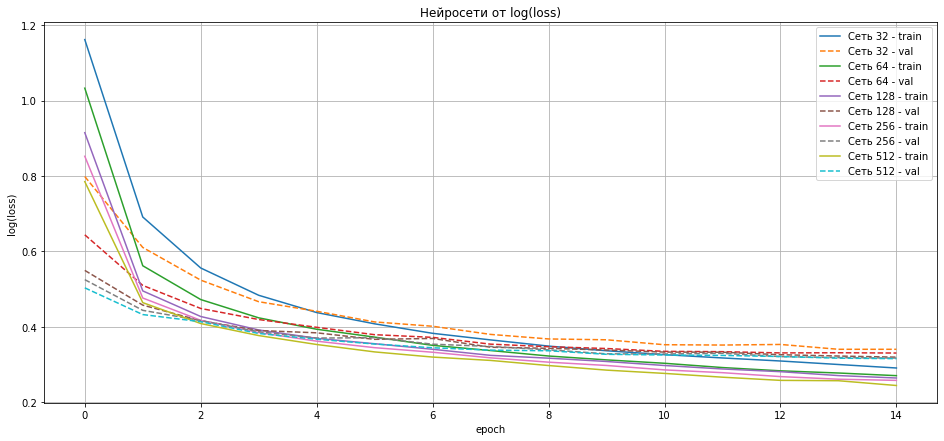

In [3]:
plt.figure(figsize = (16,7))

# Кол-во e
epochs = 15

# Вектор для вывода
epoch = np.arange(epochs)

result2 = []

for neuron_num in [32, 64, 128, 256, 512]:
    
    # Модель 
    model2 = Sequential([
        Dense(128, activation = 'relu', input_shape = (784,)),
        Dense(neuron_num, activation = 'sigmoid'),
        Dense(10, activation = 'softmax'),
    ])

    # Компиляция

    model2.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
    )

    # Обучение модели

    history2 = model2.fit(
        train_images,
        to_categorical(train_labels, 10),
        epochs = 15,
        batch_size = 600, validation_split = 0.2
    )

  # Результаты

    model_name = f'Сеть {neuron_num} нейрона'
    model_accuracy = history2.history['accuracy'][epochs-1]
    model_val_accuracy = history2.history['val_accuracy'][epochs-1]
    result2.append([model_name,model_accuracy, model_val_accuracy])

  # Изображения
    
    plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
    plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')
    
plt.legend()
plt.grid('On')

plt.title('Нейросети от log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [4]:
# Accuracy

pd.DataFrame(result2, columns = ['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending = False).head(5)

,model_name,model_accuracy,model_val_accuracy
2,Сеть 128 нейрона,0.904417,0.886833
4,Сеть 512 нейрона,0.911542,0.885833
3,Сеть 256 нейрона,0.906104,0.884917
0,Сеть 32 нейрона,0.899021,0.878333
1,Сеть 64 нейрона,0.903917,0.878250


В двухслойной модели увеличение ширины слоя повышает точность обучения на тренировочной выборке. Наилучшая точность на валидационной выборке - при 256 нейронах.

In [5]:
result_dense = []

# Модель

model2_64 = Sequential([
  Dense(128, activation = 'relu', input_shape = (784,)),
  Dense(64, activation = 'sigmoid'),
  Dense(10, activation = 'softmax'),
])

# Компиляция

model2_64.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

# Обучение

history2_64 = model2_64.fit(
  train_images,
  to_categorical(train_labels, 10),
  epochs = 15,
  batch_size = 600, validation_split = 0.2
)

# Оценка

test_scores2_64 = model2_64.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Результаты

mod_name = f'2-слойная сеть'
mod_accuracy = history2_64.history['accuracy'][epochs-1]
mod_val_accuracy = history2_64.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2_64[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 6ms/step - loss: 1.3986 - accuracy: 0.5877 - val_loss: 0.6223 - val_accuracy: 0.7996
Epoch 2/15
80/80 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.8141 - val_loss: 0.4925 - val_accuracy: 0.8344
Epoch 3/15
80/80 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.8461 - val_loss: 0.4430 - val_accuracy: 0.8484
Epoch 4/15
80/80 [==============================] - 0s 3ms/step - loss: 0.4258 - accuracy: 0.8545 - val_loss: 0.4144 - val_accuracy: 0.8531
Epoch 5/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8631 - val_loss: 0.3931 - val_accuracy: 0.8618
Epoch 6/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8695 - val_loss: 0.3755 - val_accuracy: 0.8679
Epoch 7/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8771 - val_loss: 0.3693 - val_accuracy: 0.8693
Epoch 8/15
80/80 [==

### 3-слойная модель

In [6]:
# Модель

model3 = Sequential([
  Dense(128, activation = 'relu', input_shape = (784,)),
  Dense(110, activation = 'relu'),
  Dense(64, activation = 'sigmoid'),
  Dense(10, activation = 'softmax'),
])

# Компиляция

model3.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

# Обучение

history3 = model3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs = 15,
  batch_size = 600, validation_split = 0.2
)

# Оценка

test_scores3 = model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Результаты

mod_name = f'3-слойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 5ms/step - loss: 1.4012 - accuracy: 0.5692 - val_loss: 0.5927 - val_accuracy: 0.8041
Epoch 2/15
80/80 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.8228 - val_loss: 0.4754 - val_accuracy: 0.8370
Epoch 3/15
80/80 [==============================] - 0s 3ms/step - loss: 0.4384 - accuracy: 0.8546 - val_loss: 0.4325 - val_accuracy: 0.8497
Epoch 4/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8642 - val_loss: 0.3921 - val_accuracy: 0.8650
Epoch 5/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.8736 - val_loss: 0.3700 - val_accuracy: 0.8690
Epoch 6/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8811 - val_loss: 0.3622 - val_accuracy: 0.8702
Epoch 7/15
80/80 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8857 - val_loss: 0.3558 - val_accuracy: 0.8744
Epoch 8/15
80/80 [==

### 5-слойная модель

In [7]:
# Модель

model5 = Sequential([
  Dense(128, activation = 'relu', input_shape = (784,)),
  Dense(110, activation = 'relu'),
  Dense(256, activation = 'tanh'),
  Dense(128, activation = 'tanh'),
  Dense(64, activation = 'sigmoid'),
  Dense(10, activation = 'softmax'),
])

# Компиляция

model5.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

# Обучение

history5 = model5.fit(
  train_images,
  to_categorical(train_labels, 10),
  epochs = 15,
  batch_size = 600, validation_split = 0.2
)

# Оценка

test_scores5 = model5.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Результаты

mod_name = f'5-слойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 7ms/step - loss: 1.3651 - accuracy: 0.6081 - val_loss: 0.5699 - val_accuracy: 0.8156
Epoch 2/15
80/80 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.8376 - val_loss: 0.4545 - val_accuracy: 0.8481
Epoch 3/15
80/80 [==============================] - 0s 5ms/step - loss: 0.4226 - accuracy: 0.8596 - val_loss: 0.4066 - val_accuracy: 0.8591
Epoch 4/15
80/80 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8703 - val_loss: 0.3812 - val_accuracy: 0.8683
Epoch 5/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3398 - accuracy: 0.8831 - val_loss: 0.3747 - val_accuracy: 0.8693
Epoch 6/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3226 - accuracy: 0.8878 - val_loss: 0.3592 - val_accuracy: 0.8736
Epoch 7/15
80/80 [==============================] - 0s 6ms/step - loss: 0.3152 - accuracy: 0.8881 - val_loss: 0.3492 - val_accuracy: 0.8799
Epoch 8/15
80/80 [==

### 10-слойная модель

In [8]:
# Модель

model10 = Sequential([
  Dense(128, activation = 'relu', input_shape = (784,)),
  Dense(110, activation = 'relu'), 
  Dense(256, activation = 'tanh'),
  Dense(128, activation = 'tanh'),
  Dense(60, activation = 'sigmoid'),
  Dense(60, activation = 'relu'),
  Dense(64, activation = 'tanh'),
  Dense(128, activation = 'tanh'),
  Dense(256, activation = 'relu'),
  Dense(64, activation = 'sigmoid'),
  Dense(10, activation = 'softmax'),
])

# Компиляция

model10.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy',
  metrics = ['accuracy'],
)

# Обучение

history10 = model10.fit(
  train_images,
  to_categorical(train_labels, 10),
  epochs = 15,
  batch_size = 600, validation_split = 0.2
)

# Оценка

test_scores10 = model10.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Результаты

mod_name = f'10-слойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 10ms/step - loss: 1.6988 - accuracy: 0.4276 - val_loss: 0.6213 - val_accuracy: 0.7928
Epoch 2/15
80/80 [==============================] - 1s 8ms/step - loss: 0.5815 - accuracy: 0.8011 - val_loss: 0.4944 - val_accuracy: 0.8354
Epoch 3/15
80/80 [==============================] - 1s 8ms/step - loss: 0.4604 - accuracy: 0.8465 - val_loss: 0.4222 - val_accuracy: 0.8585
Epoch 4/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3914 - accuracy: 0.8665 - val_loss: 0.4076 - val_accuracy: 0.8593
Epoch 5/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3643 - accuracy: 0.8745 - val_loss: 0.3802 - val_accuracy: 0.8698
Epoch 6/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3466 - accuracy: 0.8797 - val_loss: 0.3696 - val_accuracy: 0.8712
Epoch 7/15
80/80 [==============================] - 1s 9ms/step - loss: 0.3202 - accuracy: 0.8876 - val_loss: 0.3790 - val_accuracy: 0.8688
Epoch 8/15
80/80 [=

Text(0.5, 1.0, 'Потери')

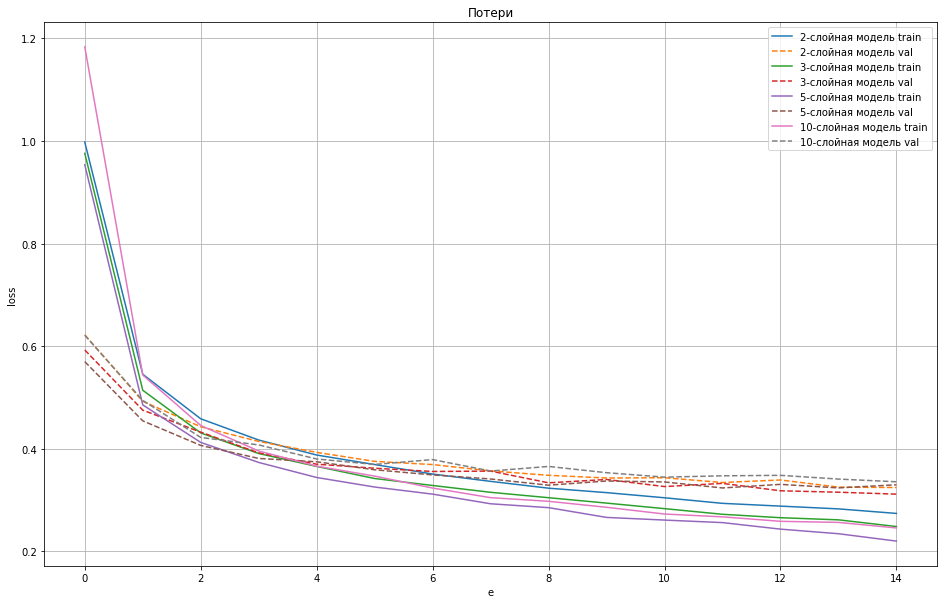

In [9]:
# Визуализация

plt.figure(figsize = (16, 10))

plt.plot(history2_64.history['loss'],'-', label = '2-слойная модель train')
plt.plot(history2_64.history['val_loss'],'--', label = '2-слойная модель val')
plt.plot(history3.history['loss'],'-', label = '3-слойная модель train')
plt.plot(history3.history['val_loss'],'--', label = '3-слойная модель val')
plt.plot(history5.history['loss'],'-', label = '5-слойная модель train')
plt.plot(history5.history['val_loss'],'--', label = '5-слойная модель val')
plt.plot(history10.history['loss'],'-', label = '10-слойная модель train')
plt.plot(history10.history['val_loss'],'--', label = '10-слойная модель val')
plt.xlabel('e')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери')

Text(0.5, 1.0, 'Точность')

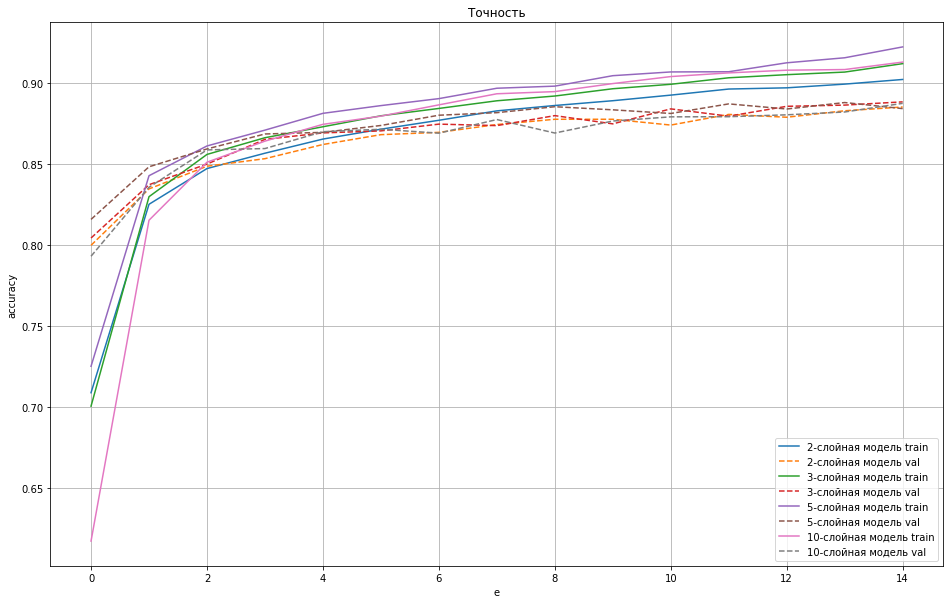

In [10]:
plt.figure(figsize = (16, 10))

plt.plot(history2_64.history['accuracy'],'-', label = '2-слойная модель train')
plt.plot(history2_64.history['val_accuracy'],'--', label = '2-слойная модель val')
plt.plot(history3.history['accuracy'],'-', label = '3-слойная модель train')
plt.plot(history3.history['val_accuracy'],'--', label = '3-слойная модель val')
plt.plot(history5.history['accuracy'],'-', label = '5-слойная модель train')
plt.plot(history5.history['val_accuracy'],'--', label = '5-слойная модель val')
plt.plot(history10.history['accuracy'],'-', label = '10-слойная модель train')
plt.plot(history10.history['val_accuracy'],'--', label = '10-слойная модель val')
plt.xlabel('e')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Точность')

In [11]:
# Оценка Accuracy

pd.DataFrame(result_dense, columns = ['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending = False).head(5)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
1,3-слойная сеть,0.911771,0.888167,0.8807
3,10-слойная сеть,0.912729,0.887250,0.8802
0,2-слойная сеть,0.902000,0.885000,0.8760
2,5-слойная сеть,0.922104,0.884000,0.8786


В 3-слойной модели точность выше.

---

### Эксперимент с различными оптимизаторами

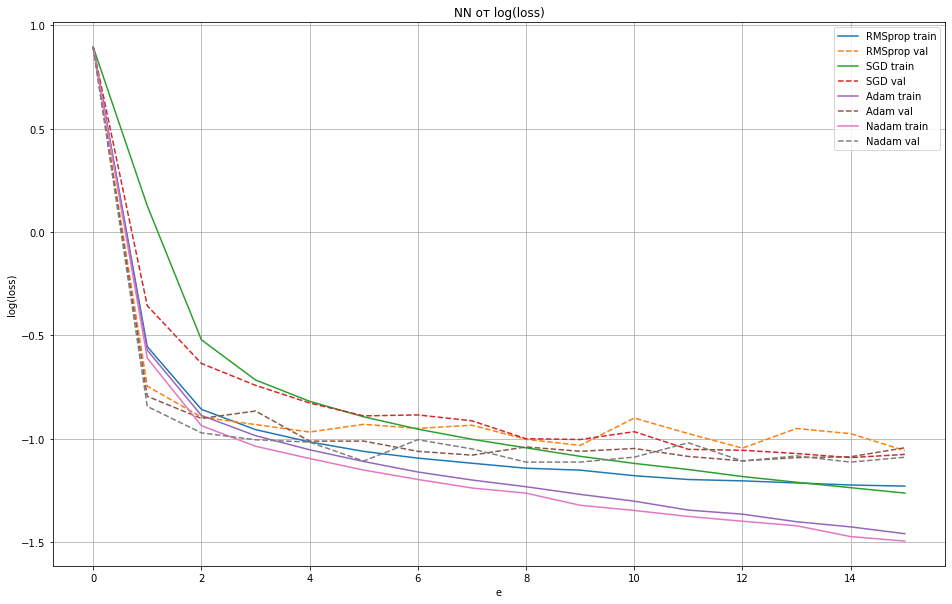

In [12]:
# Модель

model = Sequential([
  Dense(128, activation = 'relu', input_shape = (784,)),
  Dense(110, activation = 'relu'),
  Dense(256, activation = 'tanh'),
  Dense(128, activation = 'tanh'),
  Dense(64, activation = 'sigmoid'),
  Dense(10, activation = 'softmax'),
])

model.save_weights('model.h5')

plt.figure(figsize = (16, 10))

epochs = 15
epoch = np.arange(epochs+1)

result=[]

# Оптимизаторы

for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]:
    
    modeli = Sequential([
        Dense(128, activation = 'relu', input_shape = (784,)),
        Dense(110, activation = 'relu'),
        Dense(256, activation = 'tanh'),
        Dense(128, activation = 'tanh'),
        Dense(64, activation = 'sigmoid'),
        Dense(10, activation = 'softmax'),
    ])
    
    modeli.load_weights('model.h5')
    modeli.compile(
        optimizer = i_optim,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
    )
    
    # Ошибка

    hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    
    # Обучение

    hh = modeli.fit(
        train_images,
        to_categorical(train_labels),
        epochs = epochs,
        batch_size = 32, validation_split = 0.2, verbose = 0
    )

    # Результаты
    
    method_name = modeli.optimizer.get_config()['name']
    method_accuracy = hh.history['accuracy'][14]
    method_val_accuracy = hh.history['val_accuracy'][14]
    result.append([method_name,method_accuracy, method_val_accuracy])


    # Изображения
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
    
plt.legend()
plt.grid('On')

plt.title('NN от log(loss)')
plt.xlabel('e')
plt.ylabel('log(loss)')
plt.show()

In [13]:
# Оценка Accuracy

pd.DataFrame(result, columns = ['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending = False).head(4)

,method_name,method_accuracy,method_val_accuracy
3,Nadam,0.918750,0.890083
0,RMSprop,0.895896,0.883333
2,Adam,0.915333,0.882917
1,SGD,0.899000,0.879917


Качество классификации в нейросети на тестовом наборе помогла улучшить настройка архитектуры модели, а именно подбор ширины скрытого слоя, подбор количества слоев, подбор оптимизатора

In [14]:
# Config

modeli.optimizer.get_config()

{'name': 'Nadam',
 'learning_rate': 0.001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

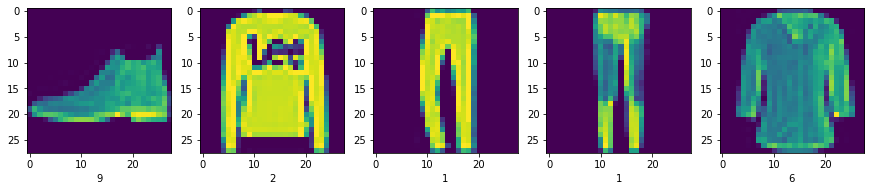

In [15]:
# Результат предсказаний для обученной модели

N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis = 1)
plt.figure(figsize = (3*N,5))

for i in range(N):
    
    plt.subplot(1,N,i+1)
    plt.imshow(test_images[i,:].reshape(28,28))
    plt.xlabel(str(y_pred_class[i]))
    
plt.show()

In [17]:
# Оценка предсказаний на тестовой выборке

test_pred = np.argmax(modeli.predict(test_images), axis = 1)
print(classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1000
           1       0.96      0.97      0.97      1000
           2       0.81      0.78      0.80      1000
           3       0.86      0.89      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.98      0.94      0.96      1000
           6       0.69      0.70      0.70      1000
           7       0.91      0.97      0.94      1000
           8       0.95      0.98      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[776   5  11  46   2   0 146   1  13   0]
 [  3 974   1  13   3   0   4   0   2   0]
 [ 11   4 784  14  97   0  83   0   7   0]
 [ 15  23   6 892  42   0  16   0   6   0]
 [  1   0  87  21 828   0  59   0   4   0]
 [  0   0   0   1   0 939 

In [18]:
# Сохранение модели на диск

model.save_weights('model.h5')